In [13]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US = df_US.explode('job_skills')
df_US_group = df_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_US_top_pay = df_US_group.sort_values(by='median', ascending=False).head(10)
df_US_skills = df_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

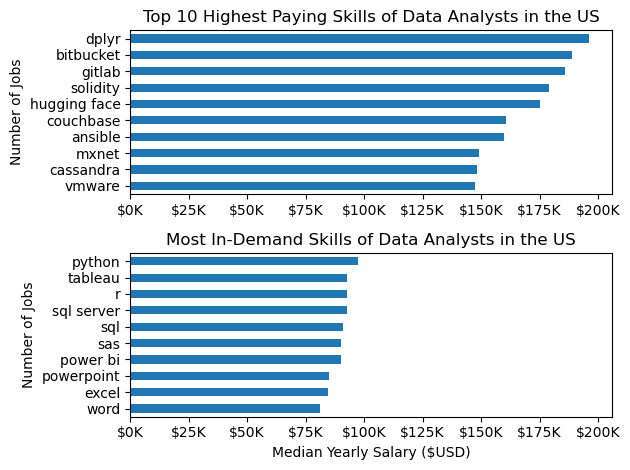

In [36]:
fig, ax = plt.subplots(2, 1)

df_US_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_ylabel('Number of Jobs')
ax[0].set_title('Top 10 Highest Paying Skills of Data Analysts in the US')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_US_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_ylabel('Number of Jobs')
ax[1].set_xlabel('Median Yearly Salary ($USD)')
ax[1].set_title('Most In-Demand Skills of Data Analysts in the US')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

In [37]:
import seaborn as sns

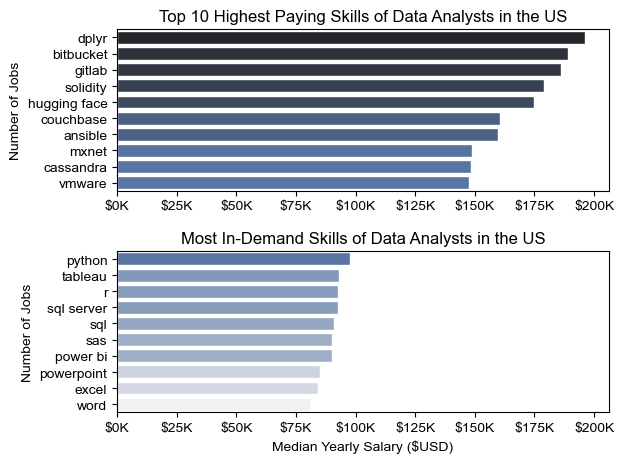

In [56]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
sns.barplot(data=df_US_top_pay, x='median', y=df_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_ylabel('Number of Jobs')
ax[0].set_title('Top 10 Highest Paying Skills of Data Analysts in the US')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].set_xlabel('')
ax[0].legend().remove()

sns.barplot(data=df_US_skills, x='median', y=df_US_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].set_ylabel('Number of Jobs')
ax[1].set_xlabel('Median Yearly Salary ($USD)')
ax[1].set_title('Most In-Demand Skills of Data Analysts in the US')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend().remove()

plt.tight_layout()
plt.show()

(0.0, 250000.0)

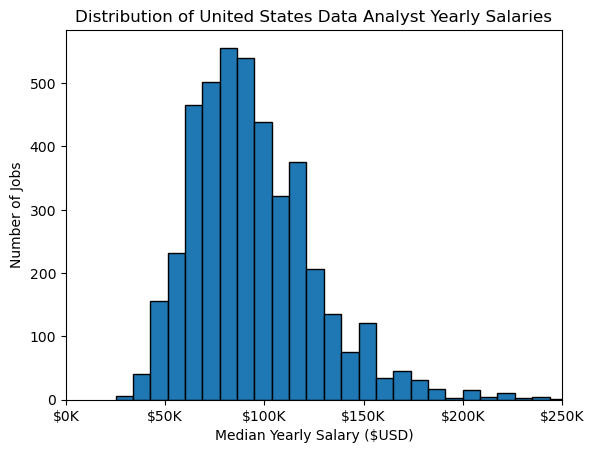

In [ ]:
df_US_hist = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US_hist['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Median Yearly Salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 250000)

(0.0, 250000.0)

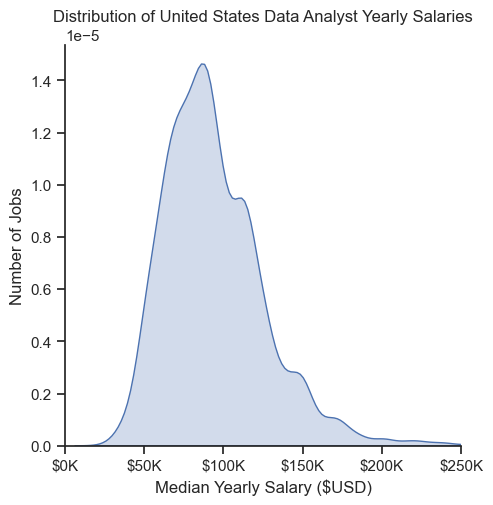

In [57]:
sns.set_theme(style='ticks')
sns.displot(data=df_US_hist['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Median Yearly Salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 250000)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27612\3124301188.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


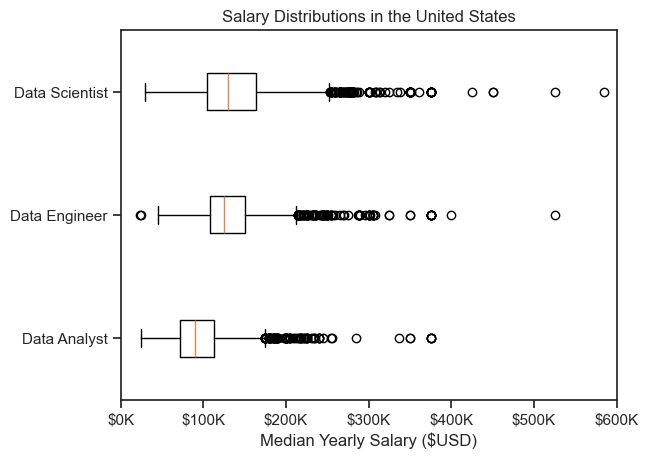

In [68]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US_box = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].dropna(subset=['salary_year_avg'])

job_list = [df_US_box[df_US_box['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.xlabel('Median Yearly Salary ($USD)')
plt.show()

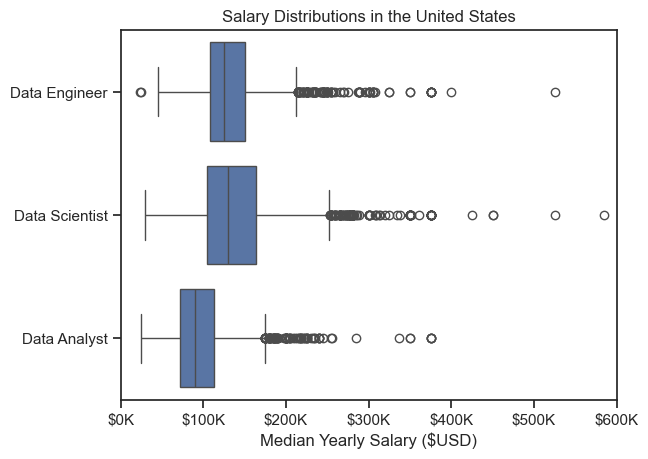

In [72]:
sns.boxplot(data=df_US_box, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distributions in the United States')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.ylabel('')
plt.xlim(0, 600000)
plt.xlabel('Median Yearly Salary ($USD)')
plt.show()